<a href="https://colab.research.google.com/github/greygrease/Project-Bitcoin-Price-Predictor-NBeats--Conv1D/blob/main/Bitcoin_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-07-18 04:45:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-07-18 04:45:08 (7.57 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Import Data

In [ ]:
# Import with pandas
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

In [ ]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns = {'Closing Price (USD)' : 'Prices'})
bitcoin_prices.head()

,Prices
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0, 0.5, 'BTC price')

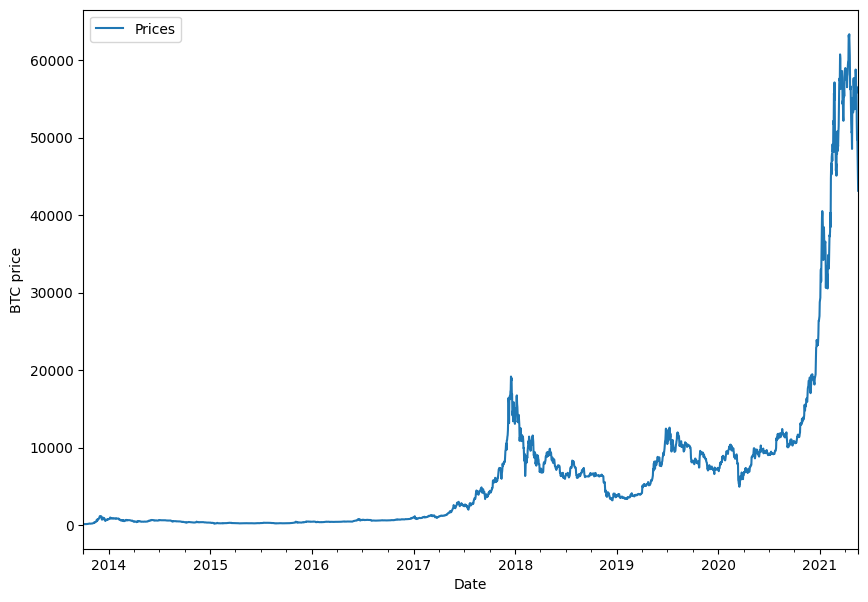

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = (10, 7))
plt.ylabel('BTC price')

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #get rid of column titles

  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc_price.append(float(line[2]))

timesteps[:10], bitcoin_prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
                Prices
 Date                 
 2013-10-01  123.65499
 2013-10-02  125.45500
 2013-10-03  108.58483
 2013-10-04  118.67466
 2013-10-05  121.33866
 2013-10-06  120.65533
 2013-10-07  121.79500
 2013-10-08  123.03300
 2013-10-09  124.04900
 2013-10-10  125.96116)

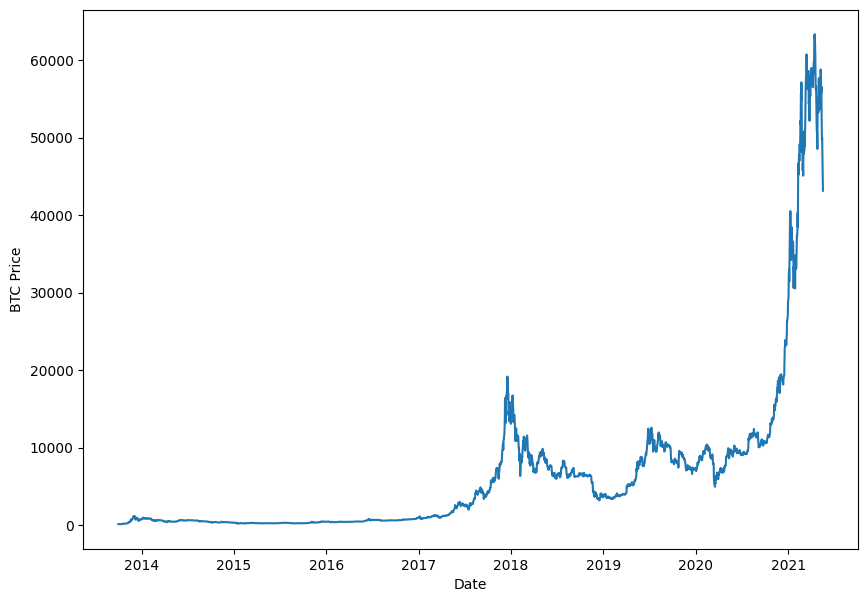

In [ ]:
import numpy as np
plt.figure(figsize = (10, 7))
plt.plot(timesteps, bitcoin_prices)
plt.ylabel('BTC Price')
plt.xlabel('Date');

## Create and Train and Test set (wrong way)

In [ ]:
bitcoin_prices[:5]

,Prices
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices.Prices.to_numpy()

In [ ]:
timesteps[:5], prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size = 0.2,
                                                    random_state = 42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2229,), (2229,), (558,), (558,))

Text(0, 0.5, 'Date')

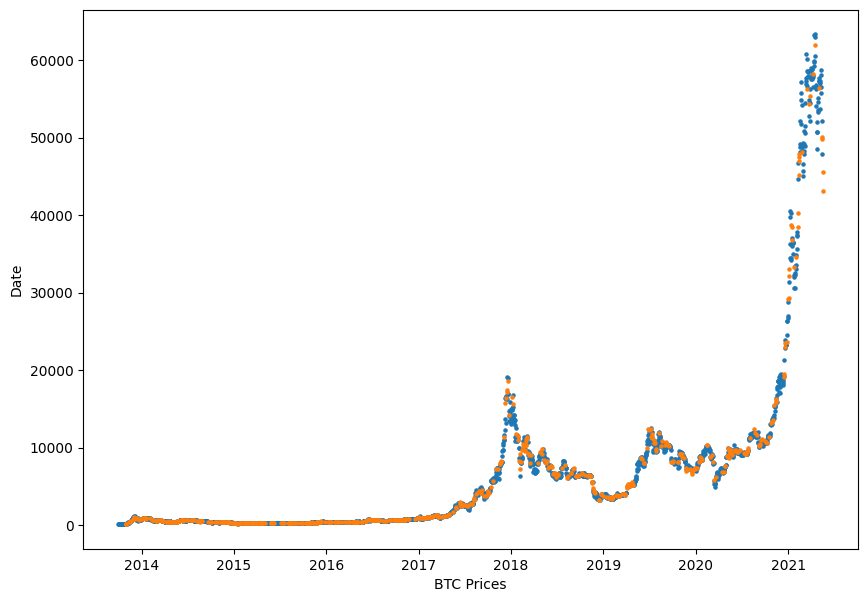

In [ ]:
# Plot wrong

plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s = 5, label = 'Train Data')
plt.scatter(X_test, y_test, s = 5, label = 'Test Data')
plt.xlabel('BTC Prices')
plt.ylabel('Date')

## Create train and test (the correct way)

In [ ]:
(20/100) * len(df)

557.4

In [ ]:
split_size = int(0.8 * len(prices))

# Create train data splits

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train)

(2229, 2229)

Text(0, 0.5, 'Date')

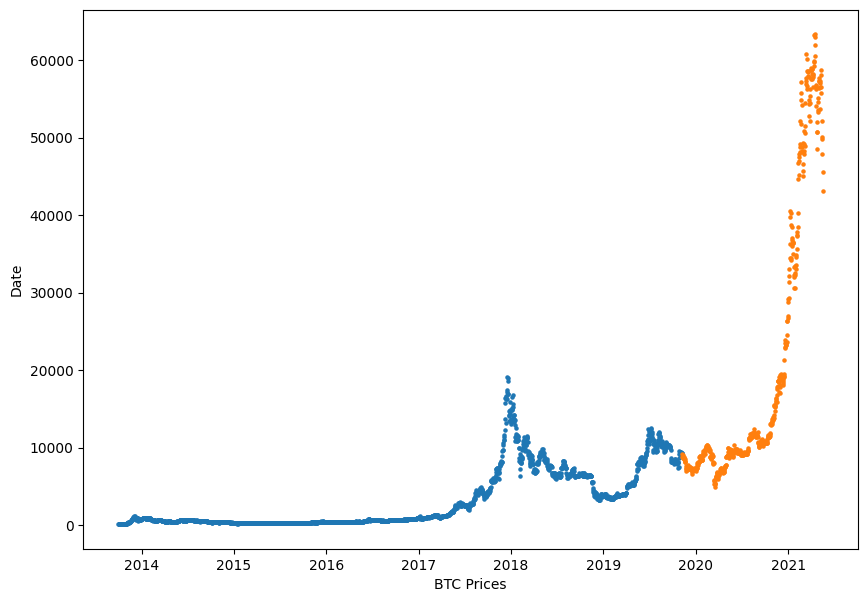

In [ ]:
# Plot correct

plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s = 5, label = 'Train Data')
plt.scatter(X_test, y_test, s = 5, label = 'Test Data')
plt.xlabel('BTC Prices')
plt.ylabel('Date')

## Create plotting Functions

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

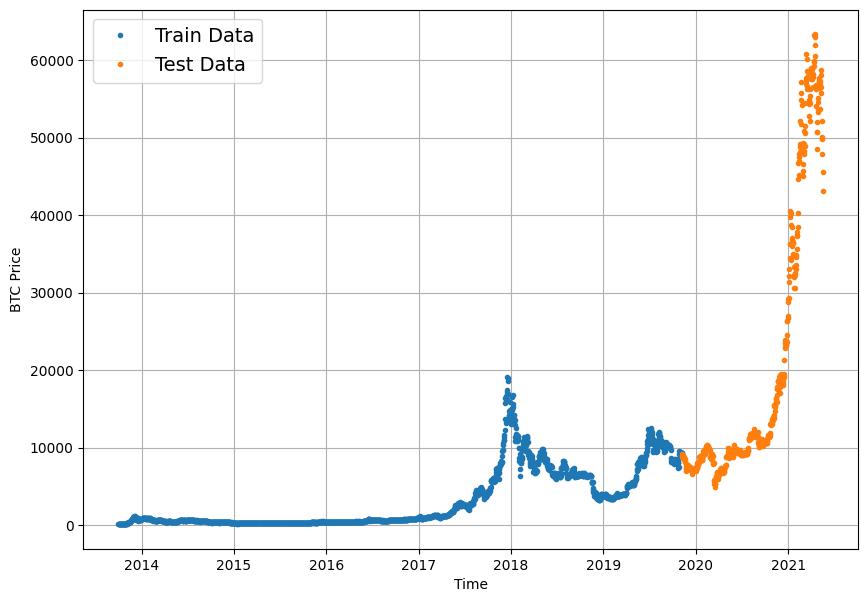

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_train, values = y_train, label = 'Train Data')
plot_time_series(timesteps = X_test, values = y_test, label = 'Test Data')

# Modelling

## Model 0 : Naive Model

In [ ]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [ ]:
# Create naive forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [ ]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

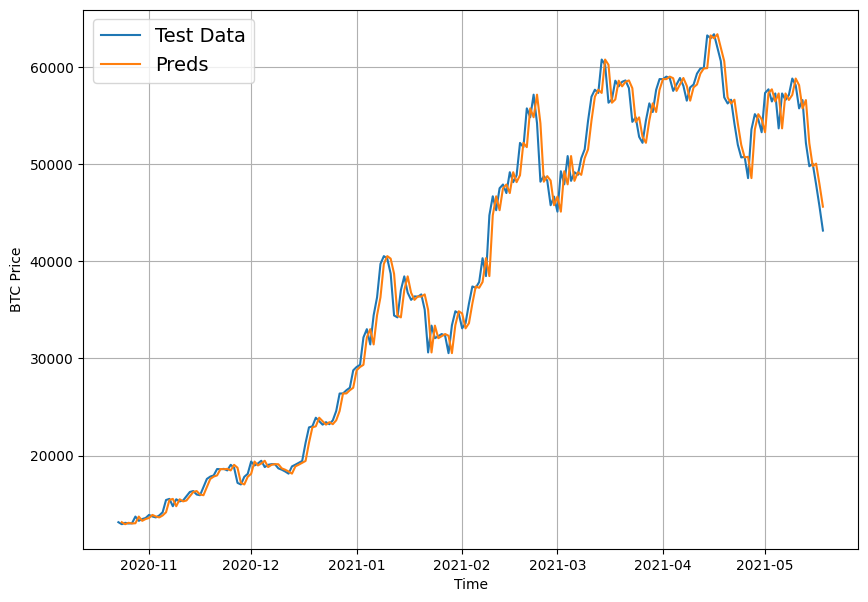

In [ ]:
plt.figure(figsize = (10, 7))
# plot_time_series(timesteps = X_train, values = y_train, label = 'Train Data')
plot_time_series(timesteps = X_test, values = y_test, format = '-', start = 350,  label = 'Test Data')
plot_time_series(timesteps = X_test[1:], values = naive_forecast, start = 350, format = '-', label = 'Preds')

### Evaluating a time series model



In [ ]:
import tensorflow as tf

In [ ]:
# MASE

def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [ ]:
# Create eval funtcion

def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true = y_test[1:],
                        y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Format Data Windowing Dataset

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create function to label windowed data

def get_labelled_windows(x, horizon = HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis = 0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
for i in range(3):
  print(f'Window: {full_windows[i]} --> Label: {full_labels[i]}')

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] --> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] --> Label: [125.96116]


In [ ]:
for i in range(3):
  print(f'Window: {full_windows[i-3]} --> Label: {full_labels[i-3]}')

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] --> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] --> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] --> Label: [43144.47129086]


### Turning windows into trainnig and test set

In [ ]:
def make_train_test_split(windows, labels, test_split = 0.2):

  split_size = int(len(windows) * (1-test_split))

  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(train_labels)

(2224, 2224)

In [ ]:
train_labels.shape

(2224, 1)

## Make a modelling checkpoint

In [ ]:
import os

def create_model_checkpoint(model_name, save_path = 'model_experiment'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                                                   verbose = 0,
                                                                   save_best_only = True,
                                                                   monitor = 'val_loss')

## Model 1 : Dense Model (window = 7, horizon = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers


tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON, activation = 'linear')
], name = 'model_1_dense')

model_1.compile(loss = 'mae',
                optimizer = 'adam',
                metrics = ['mae', 'mse'])

model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name )])

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2017.3104 - mae: 2017.3104 - mse: 11713328.0000

18/18 [==============================] - 9s 114ms/step - loss: 1792.8879 - mae: 1792.8879 - mse: 10182198.0000 - val_loss: 1114.0117 - val_mae: 1114.0117 - val_mse: 3928605.0000
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 358.8917 - mae: 358.8917 - mse: 488497.6562 - val_loss: 1854.7952 - val_mae: 1854.7952 - val_mse: 7918398.5000
Epoch 3/100
13/18 [====================>.........] - ETA: 0s - loss: 225.1453 - mae: 225.1453 - mse: 239409.8438

18/18 [==============================] - 1s 64ms/step - loss: 216.3447 - mae: 216.3447 - mse: 223169.3750 - val_loss: 1110.9240 - val_mae: 1110.9240 - val_mse: 3445812.5000
Epoch 4/100
10/18 [===============>..............] - ETA: 0s - loss: 191.2865 - mae: 191.2865 - mse: 185760.5156

18/18 [==============================] - 1s 61ms/step - loss: 173.6531 - mae: 173.6531 - mse: 153727.9219 - val_loss: 981.9502 - val_mae: 981.9502 - val_mse: 2955976.7500
Epoch 5/100
11/18 [=================>............] - ETA: 0s - loss: 174.8356 - mae: 174.8356 - mse: 166879.5625

18/18 [==============================] - 1s 82ms/step - loss: 166.7598 - mae: 166.7598 - mse: 149772.0000 - val_loss: 925.3320 - val_mae: 925.3320 - val_mse: 2753690.7500
Epoch 6/100
18/18 [==============================] - 0s 22ms/step - loss: 164.5341 - mae: 164.5341 - mse: 143060.4219 - val_loss: 930.1216 - val_mae: 930.1216 - val_mse: 2875002.0000
Epoch 7/100
 9/18 [==============>...............] - ETA: 0s - loss: 176.6440 - mae: 176.6440 - mse: 169435.9219

18/18 [==============================] - 2s 103ms/step - loss: 161.3141 - mae: 161.3141 - mse: 136802.8750 - val_loss: 882.0013 - val_mae: 882.0013 - val_mse: 2541872.7500
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 157.0514 - mae: 157.0514 - mse: 133800.5312

18/18 [==============================] - 1s 79ms/step - loss: 157.0715 - mae: 157.0715 - mse: 130879.5859 - val_loss: 858.0503 - val_mae: 858.0503 - val_mse: 2446036.0000
Epoch 9/100
18/18 [==============================] - 0s 13ms/step - loss: 153.7958 - mae: 153.7958 - mse: 128714.3594 - val_loss: 874.6438 - val_mae: 874.6438 - val_mse: 2401694.5000
Epoch 10/100
10/18 [===============>..............] - ETA: 0s - loss: 145.8413 - mae: 145.8413 - mse: 110808.3750

18/18 [==============================] - 1s 58ms/step - loss: 149.4976 - mae: 149.4976 - mse: 122124.2891 - val_loss: 827.0379 - val_mae: 827.0379 - val_mse: 2244208.5000
Epoch 11/100
10/18 [===============>..............] - ETA: 0s - loss: 146.5684 - mae: 146.5684 - mse: 124857.3281

18/18 [==============================] - 1s 69ms/step - loss: 145.6390 - mae: 145.6390 - mse: 116181.6562 - val_loss: 804.9226 - val_mae: 804.9226 - val_mse: 2145028.2500
Epoch 12/100
18/18 [==============================] - 0s 14ms/step - loss: 142.3934 - mae: 142.3934 - mse: 111674.8359 - val_loss: 875.3782 - val_mae: 875.3782 - val_mse: 2258417.0000
Epoch 13/100
16/18 [=========================>....] - ETA: 0s - loss: 140.7154 - mae: 140.7154 - mse: 112716.1094

18/18 [==============================] - 1s 83ms/step - loss: 141.7084 - mae: 141.7084 - mse: 112147.9062 - val_loss: 788.7858 - val_mae: 788.7858 - val_mse: 1991659.0000
Epoch 14/100
18/18 [==============================] - 0s 13ms/step - loss: 136.4115 - mae: 136.4115 - mse: 104310.0703 - val_loss: 792.1640 - val_mae: 792.1640 - val_mse: 1956932.1250
Epoch 15/100
18/18 [==============================] - ETA: 0s - loss: 136.0465 - mae: 136.0465 - mse: 102500.3203

18/18 [==============================] - 1s 76ms/step - loss: 136.0465 - mae: 136.0465 - mse: 102500.3203 - val_loss: 787.0925 - val_mae: 787.0925 - val_mse: 1912522.8750
Epoch 16/100
11/18 [=================>............] - ETA: 0s - loss: 132.9783 - mae: 132.9783 - mse: 92694.1719

18/18 [==============================] - 1s 85ms/step - loss: 134.1082 - mae: 134.1082 - mse: 99593.9141 - val_loss: 750.7290 - val_mae: 750.7290 - val_mse: 1793153.3750
Epoch 17/100
11/18 [=================>............] - ETA: 0s - loss: 138.4194 - mae: 138.4194 - mse: 104900.6562

18/18 [==============================] - 1s 64ms/step - loss: 130.8996 - mae: 130.8996 - mse: 95581.3516 - val_loss: 723.3723 - val_mae: 723.3723 - val_mse: 1708584.5000
Epoch 18/100
11/18 [=================>............] - ETA: 0s - loss: 134.1635 - mae: 134.1635 - mse: 102440.5000

18/18 [==============================] - 1s 80ms/step - loss: 127.7630 - mae: 127.7630 - mse: 92531.0234 - val_loss: 716.1718 - val_mae: 716.1718 - val_mse: 1663304.7500
Epoch 19/100
18/18 [==============================] - 0s 20ms/step - loss: 126.0271 - mae: 126.0271 - mse: 90337.6641 - val_loss: 735.8442 - val_mae: 735.8442 - val_mse: 1684337.0000
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 127.6218 - mae: 127.6218 - mse: 92623.9375

18/18 [==============================] - 2s 107ms/step - loss: 126.1195 - mae: 126.1195 - mse: 91446.7031 - val_loss: 675.8647 - val_mae: 675.8647 - val_mse: 1550002.1250
Epoch 21/100
18/18 [==============================] - 0s 8ms/step - loss: 126.9858 - mae: 126.9858 - mse: 91144.5625 - val_loss: 678.8252 - val_mae: 678.8252 - val_mse: 1523370.8750
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 122.3159 - mae: 122.3159 - mse: 86075.3359 

18/18 [==============================] - 1s 65ms/step - loss: 122.3159 - mae: 122.3159 - mse: 86075.3359 - val_loss: 658.0753 - val_mae: 658.0753 - val_mse: 1472159.2500
Epoch 23/100
10/18 [===============>..............] - ETA: 0s - loss: 119.5933 - mae: 119.5933 - mse: 74069.6172

18/18 [==============================] - 1s 43ms/step - loss: 120.9720 - mae: 120.9720 - mse: 84413.3750 - val_loss: 650.5737 - val_mae: 650.5737 - val_mse: 1440133.5000
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 120.6015 - mae: 120.6015 - mse: 84314.5156

18/18 [==============================] - 1s 33ms/step - loss: 120.6015 - mae: 120.6015 - mse: 84314.5156 - val_loss: 644.4649 - val_mae: 644.4649 - val_mse: 1433549.0000
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 119.4691 - mae: 119.4691 - mse: 81860.1875

18/18 [==============================] - 1s 32ms/step - loss: 118.9241 - mae: 118.9241 - mse: 80966.4531 - val_loss: 637.8201 - val_mae: 637.8201 - val_mse: 1408615.2500
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 120.8373 - mae: 120.8373 - mse: 81541.7734 - val_loss: 641.0752 - val_mae: 641.0752 - val_mse: 1416320.1250
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 119.6484 - mae: 119.6484 - mse: 81514.8828 

18/18 [==============================] - 1s 33ms/step - loss: 119.6484 - mae: 119.6484 - mse: 81514.8828 - val_loss: 621.5287 - val_mae: 621.5287 - val_mse: 1347803.6250
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 117.3110 - mae: 117.3110 - mse: 78620.3125 - val_loss: 623.8860 - val_mae: 623.8860 - val_mse: 1339331.6250
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2740 - mae: 114.2740 - mse: 77804.6953 - val_loss: 625.1630 - val_mae: 625.1630 - val_mse: 1335566.6250
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 128.7507 - mae: 128.7507 - mse: 87494.3125

18/18 [==============================] - 1s 33ms/step - loss: 118.2863 - mae: 118.2863 - mse: 79332.2969 - val_loss: 612.3263 - val_mae: 612.3263 - val_mse: 1308598.5000
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 118.4002 - mae: 118.4002 - mse: 77578.6797 - val_loss: 682.6027 - val_mae: 682.6027 - val_mse: 1457807.6250
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 120.0650 - mae: 120.0650 - mse: 79797.4453

18/18 [==============================] - 1s 32ms/step - loss: 118.0486 - mae: 118.0486 - mse: 81474.5703 - val_loss: 606.4269 - val_mae: 606.4269 - val_mse: 1289306.3750
Epoch 33/100
17/18 [===========================>..] - ETA: 0s - loss: 117.6712 - mae: 117.6712 - mse: 78935.0234 

18/18 [==============================] - 1s 36ms/step - loss: 116.8088 - mae: 116.8088 - mse: 77924.9844 - val_loss: 603.9128 - val_mae: 603.9128 - val_mse: 1287596.8750
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 116.5523 - mae: 116.5523 - mse: 78908.8203 - val_loss: 629.6835 - val_mae: 629.6835 - val_mse: 1328690.0000
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 115.5140 - mae: 115.5140 - mse: 78512.8203 - val_loss: 612.5107 - val_mae: 612.5107 - val_mse: 1289528.1250
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 127.5737 - mae: 127.5737 - mse: 83056.7656 - val_loss: 692.7358 - val_mae: 692.7358 - val_mse: 1473141.1250
Epoch 37/100
17/18 [===========================>..] - ETA: 0s - loss: 114.4944 - mae: 114.4944 - mse: 73528.6797 

18/18 [==============================] - 1s 33ms/step - loss: 115.1456 - mae: 115.1456 - mse: 76849.8438 - val_loss: 596.3779 - val_mae: 596.3779 - val_mse: 1262677.8750
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4821 - mae: 112.4821 - mse: 75782.4844 - val_loss: 602.1415 - val_mae: 602.1415 - val_mse: 1275933.7500
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7248 - mae: 113.7248 - mse: 75383.7266 - val_loss: 644.4002 - val_mae: 644.4002 - val_mse: 1377680.5000
Epoch 40/100
15/18 [========================>.....] - ETA: 0s - loss: 112.8592 - mae: 112.8592 - mse: 79006.8828 

18/18 [==============================] - 1s 34ms/step - loss: 112.3324 - mae: 112.3324 - mse: 75989.5391 - val_loss: 590.7433 - val_mae: 590.7433 - val_mse: 1237597.8750
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2879 - mae: 111.2879 - mse: 74586.3203 - val_loss: 622.3293 - val_mae: 622.3293 - val_mse: 1319456.5000
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9701 - mae: 114.9701 - mse: 77013.7500 - val_loss: 594.6252 - val_mae: 594.6252 - val_mse: 1239335.1250
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2610 - mae: 112.2610 - mse: 73434.2344 - val_loss: 601.0872 - val_mae: 601.0872 - val_mse: 1265352.7500
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8544 - mae: 113.8544 - mse: 75088.6797 - val_loss: 615.4790 - val_mae: 615.4790 - val_mse: 1296998.6250
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1117 - mae: 114.1117 - m

18/18 [==============================] - 1s 49ms/step - loss: 112.4641 - mae: 112.4641 - mse: 74471.6406 - val_loss: 583.4431 - val_mae: 583.4431 - val_mse: 1222504.5000
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8110 - mae: 110.8110 - mse: 74755.3203 - val_loss: 659.0930 - val_mae: 659.0930 - val_mse: 1374039.6250
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4744 - mae: 111.4744 - mse: 73066.9844 - val_loss: 618.9537 - val_mae: 618.9537 - val_mse: 1282678.7500
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 119.0050 - mae: 119.0050 - mse: 76494.3359 - val_loss: 586.1575 - val_mae: 586.1575 - val_mse: 1227175.1250
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4857 - mae: 110.4857 - mse: 73903.8594 - val_loss: 640.2314 - val_mae: 640.2314 - val_mse: 1346857.5000
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 111.1003 - mae: 111.1003 - m

18/18 [==============================] - 1s 48ms/step - loss: 112.1645 - mae: 112.1645 - mse: 74775.3203 - val_loss: 575.4336 - val_mae: 575.4336 - val_mse: 1198863.6250
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 109.5564 - mae: 109.5564 - mse: 72382.0156 - val_loss: 861.1017 - val_mae: 861.1017 - val_mse: 2057735.3750
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 140.3802 - mae: 140.3802 - mse: 96096.7812 - val_loss: 650.0526 - val_mae: 650.0526 - val_mse: 1362285.1250
Epoch 58/100
18/18 [==============================] - 0s 8ms/step - loss: 120.8437 - mae: 120.8437 - mse: 79809.1875 - val_loss: 657.7291 - val_mae: 657.7291 - val_mse: 1381534.8750
Epoch 59/100
18/18 [==============================] - 0s 8ms/step - loss: 109.0146 - mae: 109.0146 - mse: 71043.0703 - val_loss: 578.7020 - val_mae: 578.7020 - val_mse: 1205814.8750
Epoch 60/100
18/18 [==============================] - 0s 9ms/step - loss: 108.7742 - mae: 108.7742 - m

18/18 [==============================] - 1s 36ms/step - loss: 108.5520 - mae: 108.5520 - mse: 70263.5781 - val_loss: 571.2966 - val_mae: 571.2966 - val_mse: 1185823.3750
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7705 - mae: 109.7705 - mse: 72050.3594 - val_loss: 611.6971 - val_mae: 611.6971 - val_mse: 1258774.5000
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 110.5316 - mae: 110.5316 - mse: 72216.0391 - val_loss: 604.8607 - val_mae: 604.8607 - val_mse: 1243744.6250
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2873 - mae: 110.2873 - mse: 72629.6797 - val_loss: 571.8976 - val_mae: 571.8976 - val_mse: 1187871.0000
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2625 - mae: 110.2625 - mse: 71264.3828 - val_loss: 575.1329 - val_mae: 575.1329 - val_mse: 1194055.8750
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8060 - mae: 107.8060 - m

18/18 [==============================] - 1s 33ms/step - loss: 109.0134 - mae: 109.0134 - mse: 70956.9219 - val_loss: 567.2372 - val_mae: 567.2372 - val_mse: 1173539.1250
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 110.6698 - mae: 110.6698 - mse: 71958.6641 - val_loss: 597.0728 - val_mae: 597.0728 - val_mse: 1231442.3750
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3883 - mae: 108.3883 - mse: 71335.0078 - val_loss: 569.0955 - val_mae: 569.0955 - val_mse: 1178662.0000
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7535 - mae: 108.7535 - mse: 70904.7656 - val_loss: 602.0625 - val_mae: 602.0625 - val_mse: 1232696.3750
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3498 - mae: 111.3498 - mse: 72540.7500 - val_loss: 577.7582 - val_mae: 577.7582 - val_mse: 1191634.1250
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7156 - mae: 108.7156 - m

18/18 [==============================] - 1s 33ms/step - loss: 108.5530 - mae: 108.5530 - mse: 69901.9531 - val_loss: 567.0042 - val_mae: 567.0042 - val_mse: 1174708.7500
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7967 - mae: 108.7967 - mse: 72897.1484 - val_loss: 618.7305 - val_mae: 618.7305 - val_mse: 1277138.3750
Epoch 80/100
17/18 [===========================>..] - ETA: 0s - loss: 109.5503 - mae: 109.5503 - mse: 72129.1875 

18/18 [==============================] - 1s 34ms/step - loss: 109.0389 - mae: 109.0389 - mse: 71392.4922 - val_loss: 566.6743 - val_mae: 566.6743 - val_mse: 1172109.1250
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 95.5878 - mae: 95.5878 - mse: 46128.4727

18/18 [==============================] - 1s 31ms/step - loss: 106.3130 - mae: 106.3130 - mse: 69475.4453 - val_loss: 566.4733 - val_mae: 566.4733 - val_mse: 1171693.8750
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2721 - mae: 114.2721 - mse: 75166.9688 - val_loss: 567.1400 - val_mae: 567.1400 - val_mse: 1173577.6250
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 111.0512 - mae: 111.0512 - mse: 72154.1484 - val_loss: 696.9257 - val_mae: 696.9257 - val_mse: 1485735.8750
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6453 - mae: 112.6453 - mse: 72056.6172 - val_loss: 589.1289 - val_mae: 589.1289 - val_mse: 1219444.7500
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 107.4466 - mae: 107.4466 - mse: 70533.2891 - val_loss: 573.6617 - val_mae: 573.6617 - val_mse: 1176932.6250
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8927 - mae: 107.8927 - m

18/18 [==============================] - 1s 32ms/step - loss: 105.3142 - mae: 105.3142 - mse: 67824.1016 - val_loss: 563.9062 - val_mae: 563.9062 - val_mse: 1161169.2500
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 106.4128 - mae: 106.4128 - mse: 68474.2656 - val_loss: 586.9012 - val_mae: 586.9012 - val_mse: 1208105.2500
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 106.0372 - mae: 106.0372 - mse: 69289.3984 - val_loss: 576.2607 - val_mae: 576.2607 - val_mse: 1178208.0000
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 106.0749 - mae: 106.0749 - mse: 69302.9609 - val_loss: 582.7738 - val_mae: 582.7738 - val_mse: 1201315.3750
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3739 - mae: 107.3739 - mse: 70086.9922 - val_loss: 564.3158 - val_mae: 564.3158 - val_mse: 1160976.5000
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 116.7585 - mae: 116.7585 - 

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 671.2568 - mae: 671.2568 - mse: 1381183.3750


[671.2567749023438, 671.2567749023438, 1381183.375]

In [ ]:
# Load in the best model

model_1 = tf.keras.models.load_model('/content/model_experiment/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 563.9060 - mae: 563.9060 - mse: 1161168.5000


[563.906005859375, 563.906005859375, 1161168.5]

## Making a forecasts with a model

In [ ]:
def make_preds(model, input_data):
  forecasts = model.predict(input_data)
  return tf.squeeze(forecasts)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8857.489, 8784.032, 9021.815, 8784.81 , 8757.132, 8727.113,
        8680.848, 8536.975, 8455.589, 8527.332], dtype=float32)>)

In [ ]:
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)
model_1_results

{'mae': 563.90594,
 'mse': 1161168.6,
 'rmse': 1077.5753,
 'mape': 2.5231168,
 'mase': 0.9906266}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

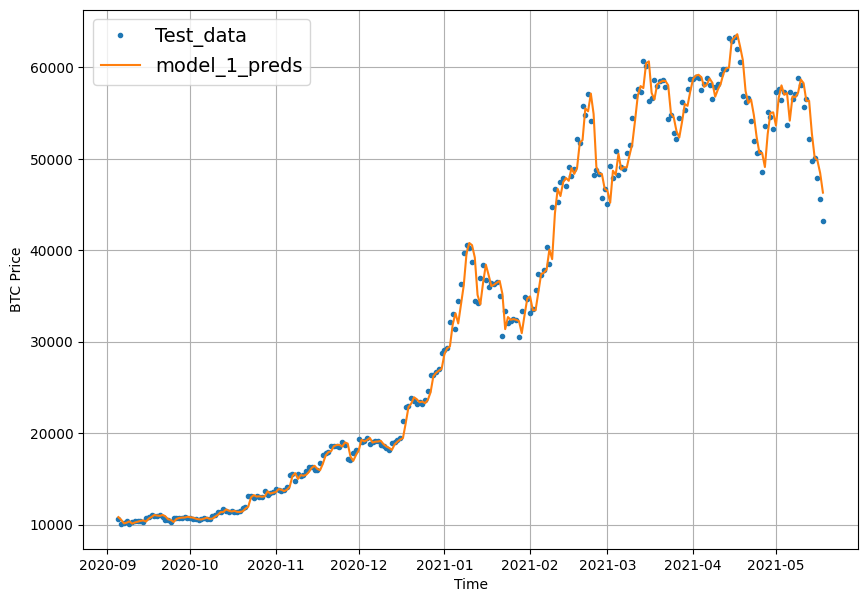

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## Model 2: Dense(Widnow:30, Horizon:1)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
# Make windowed ata
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows = full_windows,
                                                                               labels = full_labels,
                                                                               test_split = 0.2)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_2_dense')

model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

model_2.fit(train_windows, train_labels, epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 625.7303 - mae: 625.7303 - mse: 1278703.2500


[625.7302856445312, 625.7302856445312, 1278703.25]

In [ ]:
model_2 = tf.keras.models.load_model('/content/model_experiment/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 618.7145 - mae: 618.7145 - mse: 1269824.1250


[618.7144775390625, 618.7144775390625, 1269824.125]

In [ ]:
model_2_preds = make_preds(model_2,
                           input_data = test_windows)

18/18 [==============================] - 0s 1ms/step


In [ ]:
model_2_result = evaluate_preds(y_true = tf.squeeze(test_labels),
                                y_pred = model_2_preds)
model_2_result

{'mae': 618.7145,
 'mse': 1269824.1,
 'rmse': 1126.8647,
 'mape': 2.8198183,
 'mase': 1.081519}

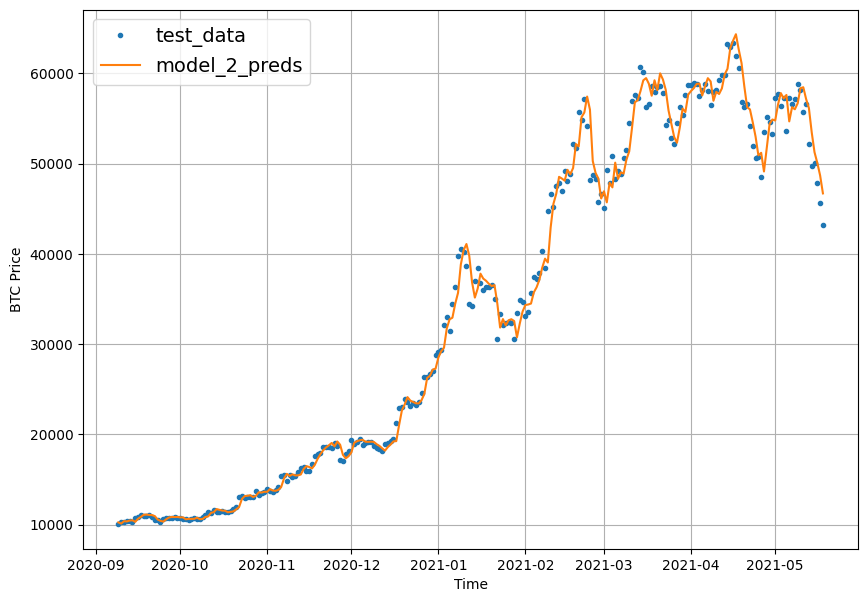

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3 Dense window = 30, horizon = 7

In [ ]:
WINDOW = 30
HORIZON = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_3_dense')

model_3.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

model_3.fit(train_windows, train_labels, epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1428.3536 - mae: 1428.3536 - mse: 6178802.5000


[1428.3536376953125, 1428.3536376953125, 6178802.5]

In [ ]:
model_3 = tf.keras.models.load_model('/content/model_experiment/model_3_dense/')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1248.3938 - mae: 1248.3938 - mse: 5491441.0000


[1248.393798828125, 1248.393798828125, 5491441.0]

In [ ]:
model_3_preds = model_3.predict(test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 3ms/step


array([[9367.8955, 9428.171 , 9527.504 , 9517.844 , 9465.3   , 9697.531 ,
        9627.34  ],
       [9062.252 , 8996.659 , 9256.756 , 9299.136 , 8982.595 , 9306.3545,
        9247.345 ],
       [8910.031 , 8905.339 , 9082.256 , 9106.841 , 8977.571 , 9143.508 ,
        9016.383 ],
       [9040.364 , 9084.39  , 9342.497 , 9150.243 , 9312.442 , 9292.299 ,
        9349.865 ],
       [8834.823 , 9005.448 , 9199.912 , 8912.962 , 9306.871 , 9110.907 ,
        9114.293 ]], dtype=float32)

In [ ]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': array([  725.5829  ,   437.33734 ,   364.89008 ,   597.9912  ,
          514.9689  ,   569.5503  ,   577.4849  ,   679.007   ,
          761.78577 ,   621.6091  ,   718.2709  ,   788.4208  ,
          834.5255  ,   899.60065 ,   684.6043  ,   271.38455 ,
          187.4684  ,   175.45207 ,   191.22746 ,   211.24553 ,
          155.62953 ,   249.35979 ,   373.05643 ,   424.20996 ,
          362.9694  ,   175.70424 ,   183.41824 ,   160.82932 ,
          234.52734 ,   294.9112  ,   427.73514 ,   507.69644 ,
          420.9142  ,   437.11105 ,   360.20187 ,   316.29688 ,
          414.39383 ,   347.17926 ,   253.82658 ,   166.00844 ,
          373.7191  ,    21.239676,    74.44092 ,   101.01263 ,
          131.25949 ,   135.23074 ,   155.06068 ,   188.2198  ,
           60.98765 ,   208.39732 ,   173.73006 ,   181.0376  ,
          319.74838 ,   190.35574 ,   225.50935 ,   327.10184 ,
          460.84897 ,   421.02707 ,   421.25677 ,   468.46274 ,
          264.08258 ,   139.6213 

In [ ]:
# Create eval funtcion

def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)


  if mae.ndim >0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1248.3938,
 'mse': 5491441.0,
 'rmse': 1430.634,
 'mape': 5.741622,
 'mase': 2.2214472}

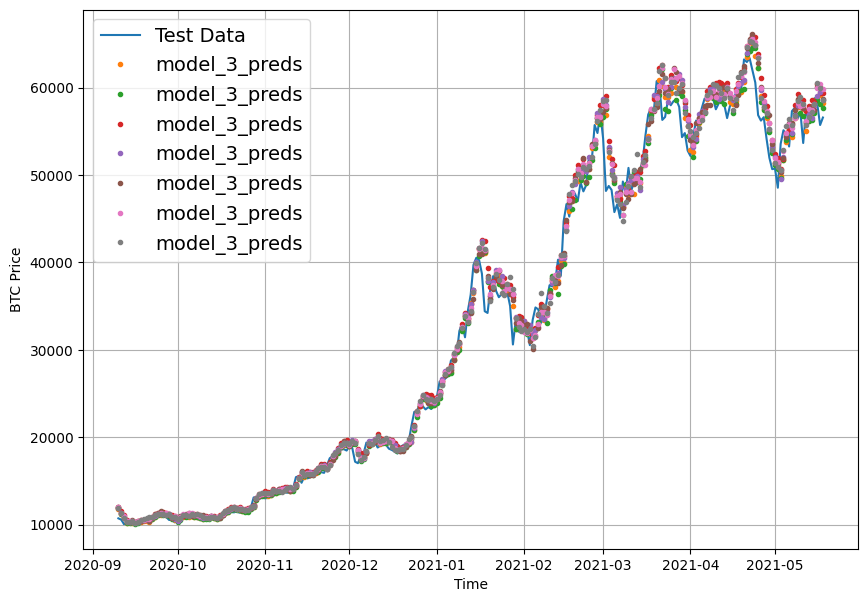

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:, 0], start = offset, format = '-', label = 'Test Data')
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_3_preds, start = offset, label = 'model_3_preds')

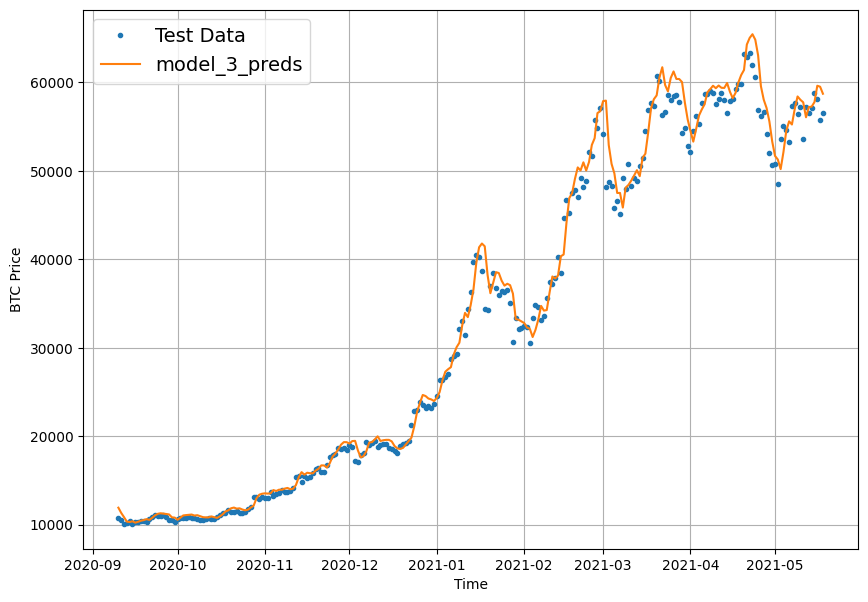

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:, 0], start = offset,  label = 'Test Data')
plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = tf.reduce_mean(model_3_preds, axis  = 1),
                 start = offset,
                 label = 'model_3_preds',
                 format = '-')

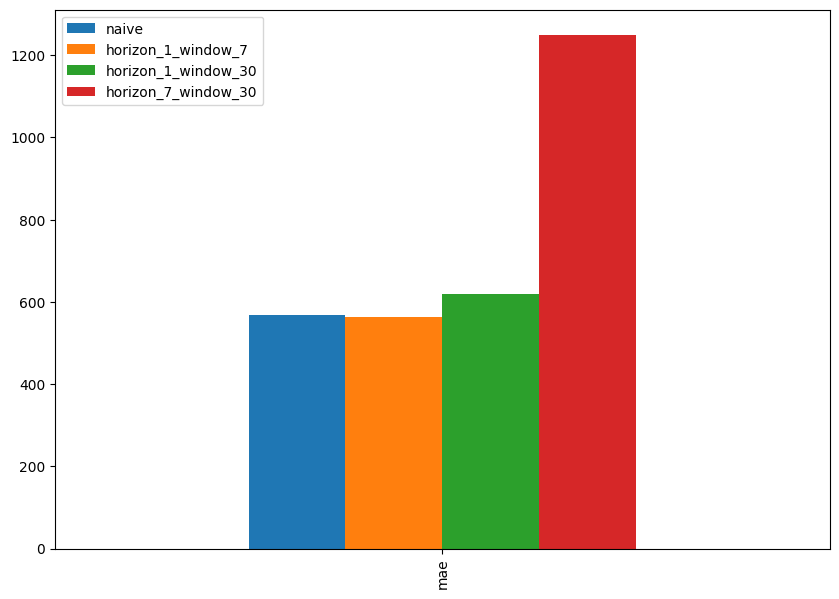

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_result["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

## Model : 4 Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(train_labels)

(2224, 2224)

In [ ]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))

In [ ]:
print(f'OG: {x.shape}')
print(f'Expand: {expand_dims_layer(x).shape}')
expand_dims_layer(x)

OG: (7,)
Expand: (7, 1)


<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

In [ ]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 628.7198


628.7198486328125

In [ ]:
model_4 = tf.keras.models.load_model('/content/model_experiment/model_4_conv1D/')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 571.7022


571.7022094726562

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4_preds = make_preds(model_4, test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 571.7022,
 'mse': 1184002.0,
 'rmse': 1088.1185,
 'mape': 2.5531976,
 'mase': 1.0043224}

## Model 5: RNN (LSTM)

In [ ]:
WINDOW_SIZE

7

In [ ]:
tf.random.set_seed(42)

inputs = layers.Input(shape = (7,), dtype = tf.float32)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
# x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(128, activation = 'relu')(x)
# x = layers.Dense(32, activation = 'relu')(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs = inputs,
                         outputs = output, name = 'model_5_lstm')

model_5.compile(loss = 'mae',
               optimizer = 'adam')


model_5.fit(train_windows,
            train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
18/18 [==============================] - 6s 226ms/step - loss: 2771.6536 - val_loss: 13552.6309
Epoch 2/100
18/18 [==============================] - 4s 219ms/step - loss: 1470.4515 - val_loss: 3020.9702
Epoch 3/100
18/18 [==============================] - 3s 201ms/step - loss: 308.3015 - val_loss: 1096.8475
Epoch 4/100
18/18 [==============================] - 4s 219ms/step - loss: 210.8714 - val_loss: 1047.1791
Epoch 5/100
18/18 [==============================] - 0s 13ms/step - loss: 193.7057 - val_loss: 1120.8190
Epoch 6/100
18/18 [==============================] - 5s 306ms/step - loss: 187.2502 - val_loss: 1039.4594
Epoch 7/100
18/18 [==============================] - 0s 14ms/step - loss: 184.9308 - val_loss: 1042.0282
Epoch 8/100
18/18 [==============================] - 0s 20ms/step - loss: 182.7361 - val_loss: 1048.9025
Epoch 9/100
18/18 [==============================] - 0s 13ms/step - loss: 181.0587 - val_loss: 1039.9880
Epoch 10/100
18/18 [===========================

In [ ]:
model_5 = tf.keras.models.load_model('/content/model_experiment/model_5_lstm/')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 3ms/step - loss: 601.6346


601.6345825195312

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8985.665, 8820.017, 8965.337, 8829.963, 8746.589], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels, axis = 1),
                                                     y_pred = model_5_preds)
model_5_results

{'mae': 601.6345,
 'mse': 1289910.6,
 'rmse': 1135.7423,
 'mape': 2.7057457,
 'mase': 1.0569053}

## Multivariate Time series

In [ ]:
# Lets make a multivariate time series
bitcoin_prices.head()

,Prices
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

# Block reward dates
block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# Add in block reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

# Add in block rewrad values as a feature
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
len(bitcoin_prices_block)/2

1393.5

In [ ]:
bitcoin_prices_block.iloc[1393]

Prices          2768.8025
block_reward         12.5
Name: 2017-07-25 00:00:00, dtype: object

<Axes: xlabel='Date'>

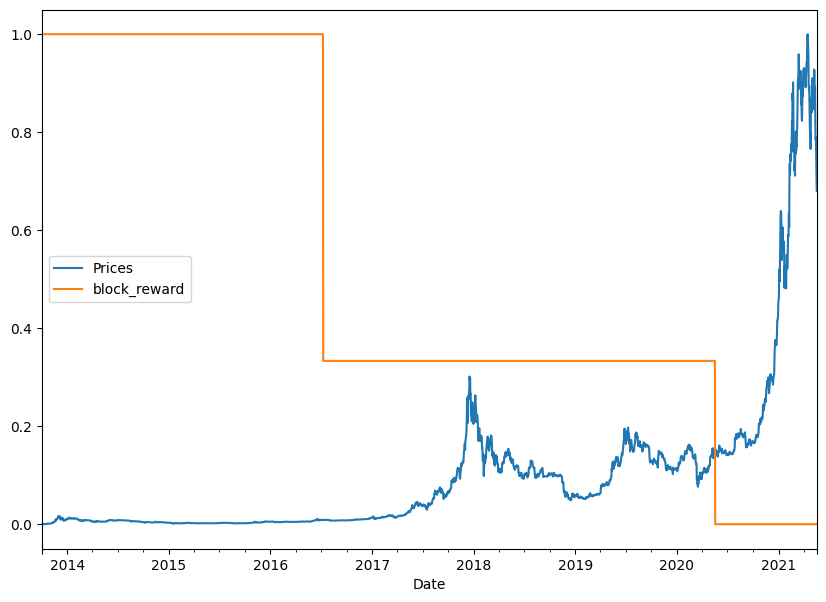

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Prices', 'block_reward']]),
                                                              columns= bitcoin_prices_block.columns,
                                                              index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize = (10, 7))

## Making a windowed dataset with pandas


In [ ]:
# Setup dataset hyperpareameter
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Prices'].shift(periods = i + 1)

bitcoin_prices_windowed.head(10)

,Prices,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# Create X and y feature
X = bitcoin_prices_windowed.dropna().drop('Prices', axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Prices'].astype(np.float32)

X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Prices, dtype: float32

In [ ]:
# Make train and test set using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_test), len(y_test)

(556, 556)

## Model 6: Multi Time Series w/Model 1 Arch

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_6_dense_multi')


model_6.compile(loss = 'mae',
                optimizer = 'adam',
                metrics = ['mae', 'mse'])

model_6.fit(x = X_train,
            y = y_train,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (X_test, y_test),
            callbacks = [create_model_checkpoint(model_name = model_6.name )])

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2685.6602 - mae: 2685.6602 - mse: 20027532.0000 

18/18 [==============================] - 2s 41ms/step - loss: 2421.2344 - mae: 2421.2344 - mse: 17506736.0000 - val_loss: 1444.8071 - val_mae: 1444.8071 - val_mse: 5277067.0000
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 394.7991 - mae: 394.7991 - mse: 588542.3750 - val_loss: 1946.7014 - val_mae: 1946.7014 - val_mse: 8782006.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 270.6938 - mae: 270.6938 - mse: 234745.7188

18/18 [==============================] - 1s 33ms/step - loss: 241.8980 - mae: 241.8980 - mse: 268711.0938 - val_loss: 1204.2607 - val_mae: 1204.2607 - val_mse: 4043870.5000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 241.9033 - mae: 241.9033 - mse: 225141.7969

18/18 [==============================] - 1s 31ms/step - loss: 187.7938 - mae: 187.7938 - mse: 179795.9531 - val_loss: 1059.1328 - val_mae: 1059.1328 - val_mse: 3447627.2500
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 181.8215 - mae: 181.8215 - mse: 126228.3125

18/18 [==============================] - 1s 33ms/step - loss: 180.3957 - mae: 180.3957 - mse: 173205.4531 - val_loss: 1000.1307 - val_mae: 1000.1307 - val_mse: 3227000.7500
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 180.0720 - mae: 180.0720 - mse: 169618.7188 - val_loss: 1002.2446 - val_mae: 1002.2446 - val_mse: 3296743.2500
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 228.0375 - mae: 228.0375 - mse: 340942.2812

18/18 [==============================] - 1s 39ms/step - loss: 174.1999 - mae: 174.1999 - mse: 159876.8906 - val_loss: 988.3754 - val_mae: 988.3754 - val_mse: 3071340.7500
Epoch 8/100
11/18 [=================>............] - ETA: 0s - loss: 172.3638 - mae: 172.3638 - mse: 154024.9844

18/18 [==============================] - 1s 59ms/step - loss: 173.8781 - mae: 173.8781 - mse: 156361.1094 - val_loss: 962.0568 - val_mae: 962.0568 - val_mse: 2933345.7500
Epoch 9/100
18/18 [==============================] - ETA: 0s - loss: 164.5127 - mae: 164.5127 - mse: 146028.0156

18/18 [==============================] - 1s 43ms/step - loss: 164.5127 - mae: 164.5127 - mse: 146028.0156 - val_loss: 943.0489 - val_mae: 943.0489 - val_mse: 2732583.5000
Epoch 10/100
12/18 [===================>..........] - ETA: 0s - loss: 154.3275 - mae: 154.3275 - mse: 119304.6953

18/18 [==============================] - 1s 46ms/step - loss: 159.3485 - mae: 159.3485 - mse: 136012.3906 - val_loss: 878.2083 - val_mae: 878.2083 - val_mse: 2496552.2500
Epoch 11/100
12/18 [===================>..........] - ETA: 0s - loss: 161.8827 - mae: 161.8827 - mse: 145227.7344

18/18 [==============================] - 3s 153ms/step - loss: 153.7614 - mae: 153.7614 - mse: 128411.7734 - val_loss: 862.9719 - val_mae: 862.9719 - val_mse: 2382280.0000
Epoch 12/100
18/18 [==============================] - 0s 16ms/step - loss: 150.9463 - mae: 150.9463 - mse: 123657.5234 - val_loss: 873.4678 - val_mae: 873.4678 - val_mse: 2355259.0000
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 148.4621 - mae: 148.4621 - mse: 122077.7812

18/18 [==============================] - 1s 82ms/step - loss: 148.1132 - mae: 148.1132 - mse: 120881.4844 - val_loss: 862.0790 - val_mae: 862.0790 - val_mse: 2282104.2500
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 143.0944 - mae: 143.0944 - mse: 112438.9375

18/18 [==============================] - 1s 71ms/step - loss: 145.1982 - mae: 145.1982 - mse: 115604.5938 - val_loss: 821.1630 - val_mae: 821.1630 - val_mse: 2129672.0000
Epoch 15/100
18/18 [==============================] - 0s 13ms/step - loss: 148.5675 - mae: 148.5675 - mse: 116723.5000 - val_loss: 854.2474 - val_mae: 854.2473 - val_mse: 2193418.5000
Epoch 16/100
 8/18 [============>.................] - ETA: 0s - loss: 136.2402 - mae: 136.2402 - mse: 99142.1797

18/18 [==============================] - 1s 76ms/step - loss: 143.7236 - mae: 143.7236 - mse: 110459.3672 - val_loss: 816.9224 - val_mae: 816.9224 - val_mse: 2051602.0000
Epoch 17/100
11/18 [=================>............] - ETA: 0s - loss: 148.1010 - mae: 148.1010 - mse: 114442.1250

18/18 [==============================] - 2s 143ms/step - loss: 140.8706 - mae: 140.8706 - mse: 105475.4531 - val_loss: 765.9229 - val_mae: 765.9229 - val_mse: 1892988.7500
Epoch 18/100
18/18 [==============================] - 0s 9ms/step - loss: 136.2640 - mae: 136.2640 - mse: 102528.3594 - val_loss: 785.2830 - val_mae: 785.2830 - val_mse: 1910915.2500
Epoch 19/100
18/18 [==============================] - 0s 10ms/step - loss: 135.1284 - mae: 135.1284 - mse: 99089.2891 - val_loss: 843.2747 - val_mae: 843.2747 - val_mse: 2080324.1250
Epoch 20/100
11/18 [=================>............] - ETA: 0s - loss: 139.6375 - mae: 139.6375 - mse: 106490.1953

18/18 [==============================] - 2s 90ms/step - loss: 133.9444 - mae: 133.9444 - mse: 97697.9531 - val_loss: 729.2344 - val_mae: 729.2344 - val_mse: 1725588.5000
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 132.6015 - mae: 132.6015 - mse: 93677.1250

18/18 [==============================] - 1s 87ms/step - loss: 133.5197 - mae: 133.5197 - mse: 98044.4609 - val_loss: 728.3821 - val_mae: 728.3821 - val_mse: 1697942.1250
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 129.5981 - mae: 129.5981 - mse: 93052.0547 

18/18 [==============================] - 2s 137ms/step - loss: 129.5981 - mae: 129.5981 - mse: 93052.0547 - val_loss: 715.9125 - val_mae: 715.9125 - val_mse: 1647960.7500
Epoch 23/100
18/18 [==============================] - 0s 24ms/step - loss: 133.2784 - mae: 133.2784 - mse: 95581.8750 - val_loss: 800.1179 - val_mae: 800.1179 - val_mse: 1891519.7500
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 130.2971 - mae: 130.2971 - mse: 90616.5859

18/18 [==============================] - 2s 93ms/step - loss: 128.6194 - mae: 128.6194 - mse: 89023.9531 - val_loss: 691.7687 - val_mae: 691.7687 - val_mse: 1557963.2500
Epoch 25/100
18/18 [==============================] - 0s 13ms/step - loss: 125.9329 - mae: 125.9329 - mse: 87434.1328 - val_loss: 698.5750 - val_mae: 698.5750 - val_mse: 1635703.7500
Epoch 26/100
18/18 [==============================] - 0s 13ms/step - loss: 128.5735 - mae: 128.5735 - mse: 89626.9766 - val_loss: 695.3099 - val_mae: 695.3099 - val_mse: 1620647.1250
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 126.3222 - mae: 126.3222 - mse: 88189.9219 

18/18 [==============================] - 1s 44ms/step - loss: 126.3222 - mae: 126.3222 - mse: 88189.9219 - val_loss: 667.3779 - val_mae: 667.3779 - val_mse: 1470559.5000
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 122.2034 - mae: 122.2034 - mse: 83271.2891 - val_loss: 673.6424 - val_mae: 673.6424 - val_mse: 1477412.1250
Epoch 29/100
16/18 [=========================>....] - ETA: 0s - loss: 120.2542 - mae: 120.2542 - mse: 80875.0234

18/18 [==============================] - 1s 56ms/step - loss: 121.5283 - mae: 121.5283 - mse: 82734.8672 - val_loss: 662.2896 - val_mae: 662.2896 - val_mse: 1477585.0000
Epoch 30/100
 9/18 [==============>...............] - ETA: 0s - loss: 113.8503 - mae: 113.8503 - mse: 71054.0156 

18/18 [==============================] - 1s 44ms/step - loss: 122.6077 - mae: 122.6077 - mse: 83171.6328 - val_loss: 658.0877 - val_mae: 658.0877 - val_mse: 1463220.8750
Epoch 31/100
18/18 [==============================] - 0s 16ms/step - loss: 119.4890 - mae: 119.4890 - mse: 81569.8594 - val_loss: 757.3074 - val_mae: 757.3074 - val_mse: 1713464.3750
Epoch 32/100
18/18 [==============================] - 0s 7ms/step - loss: 124.0458 - mae: 124.0458 - mse: 85537.0391 - val_loss: 672.3938 - val_mae: 672.3938 - val_mse: 1458214.2500
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 152.8567 - mae: 152.8567 - mse: 144549.2812

18/18 [==============================] - 1s 56ms/step - loss: 118.5510 - mae: 118.5510 - mse: 79490.3047 - val_loss: 637.8593 - val_mae: 637.8593 - val_mse: 1361851.7500
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 117.6607 - mae: 117.6607 - mse: 80425.3828 

18/18 [==============================] - 1s 75ms/step - loss: 117.6607 - mae: 117.6607 - mse: 80425.3828 - val_loss: 634.7169 - val_mae: 634.7169 - val_mse: 1350090.7500
Epoch 35/100
11/18 [=================>............] - ETA: 0s - loss: 119.1429 - mae: 119.1429 - mse: 80333.8203

18/18 [==============================] - 2s 117ms/step - loss: 116.1895 - mae: 116.1895 - mse: 79136.8203 - val_loss: 632.0601 - val_mae: 632.0601 - val_mse: 1358841.5000
Epoch 36/100
 9/18 [==============>...............] - ETA: 0s - loss: 117.0207 - mae: 117.0207 - mse: 82390.3672 

18/18 [==============================] - 2s 117ms/step - loss: 121.5082 - mae: 121.5082 - mse: 80470.3516 - val_loss: 623.0026 - val_mae: 623.0026 - val_mse: 1318935.6250
Epoch 37/100
18/18 [==============================] - 0s 16ms/step - loss: 119.1370 - mae: 119.1370 - mse: 82152.2266 - val_loss: 633.5269 - val_mae: 633.5269 - val_mse: 1362943.5000
Epoch 38/100
 7/18 [==========>...................] - ETA: 0s - loss: 123.4966 - mae: 123.4966 - mse: 93696.9141

18/18 [==============================] - 1s 69ms/step - loss: 115.3524 - mae: 115.3524 - mse: 78486.5469 - val_loss: 621.6708 - val_mae: 621.6708 - val_mse: 1308645.1250
Epoch 39/100
18/18 [==============================] - ETA: 0s - loss: 116.2831 - mae: 116.2831 - mse: 79076.8594 

18/18 [==============================] - 1s 43ms/step - loss: 116.2831 - mae: 116.2831 - mse: 79076.8594 - val_loss: 616.4362 - val_mae: 616.4362 - val_mse: 1300555.2500
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8139 - mae: 113.8139 - mse: 76712.1406 - val_loss: 619.4506 - val_mae: 619.4506 - val_mse: 1310944.7500
Epoch 41/100
18/18 [==============================] - 0s 7ms/step - loss: 117.4297 - mae: 117.4297 - mse: 77694.5938 - val_loss: 763.8636 - val_mae: 763.8636 - val_mse: 1768316.3750
Epoch 42/100
18/18 [==============================] - 0s 9ms/step - loss: 127.9830 - mae: 127.9830 - mse: 84681.6562 - val_loss: 656.2847 - val_mae: 656.2847 - val_mse: 1418285.5000
Epoch 43/100
13/18 [====================>.........] - ETA: 0s - loss: 107.2123 - mae: 107.2123 - mse: 61077.7773

18/18 [==============================] - 1s 43ms/step - loss: 113.1268 - mae: 113.1268 - mse: 76101.0703 - val_loss: 611.3275 - val_mae: 611.3275 - val_mse: 1282371.6250
Epoch 44/100
13/18 [====================>.........] - ETA: 0s - loss: 111.7626 - mae: 111.7626 - mse: 72831.3672

18/18 [==============================] - 1s 40ms/step - loss: 113.0346 - mae: 113.0346 - mse: 75252.8203 - val_loss: 603.1218 - val_mae: 603.1218 - val_mse: 1253984.5000
Epoch 45/100
 6/18 [=========>....................] - ETA: 0s - loss: 119.2535 - mae: 119.2535 - mse: 73242.9453

18/18 [==============================] - 1s 47ms/step - loss: 113.0395 - mae: 113.0395 - mse: 75018.1562 - val_loss: 602.2544 - val_mae: 602.2544 - val_mse: 1249958.8750
Epoch 46/100
18/18 [==============================] - 0s 9ms/step - loss: 113.1378 - mae: 113.1378 - mse: 74831.2500 - val_loss: 629.5203 - val_mae: 629.5203 - val_mse: 1325910.3750
Epoch 47/100
18/18 [==============================] - 0s 9ms/step - loss: 116.2765 - mae: 116.2765 - mse: 78120.7656 - val_loss: 614.4705 - val_mae: 614.4705 - val_mse: 1282637.5000
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3516 - mae: 113.3516 - mse: 76069.0078 - val_loss: 616.6033 - val_mae: 616.6033 - val_mse: 1289562.5000
Epoch 49/100
17/18 [===========================>..] - ETA: 0s - loss: 116.3439 - mae: 116.3439 - mse: 77329.3125 

18/18 [==============================] - 1s 56ms/step - loss: 116.0671 - mae: 116.0671 - mse: 76841.0625 - val_loss: 597.3223 - val_mae: 597.3223 - val_mse: 1234013.7500
Epoch 50/100
18/18 [==============================] - 0s 9ms/step - loss: 121.9744 - mae: 121.9744 - mse: 79978.2656 - val_loss: 641.5928 - val_mae: 641.5928 - val_mse: 1350912.5000
Epoch 51/100
 9/18 [==============>...............] - ETA: 0s - loss: 112.1813 - mae: 112.1813 - mse: 73082.5000

18/18 [==============================] - 1s 52ms/step - loss: 113.5135 - mae: 113.5135 - mse: 73354.8672 - val_loss: 593.1285 - val_mae: 593.1285 - val_mse: 1222961.0000
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1706 - mae: 113.1706 - mse: 76095.7969 - val_loss: 594.9300 - val_mae: 594.9300 - val_mse: 1226554.7500
Epoch 53/100
18/18 [==============================] - 0s 12ms/step - loss: 113.6828 - mae: 113.6828 - mse: 75466.4844 - val_loss: 652.7954 - val_mae: 652.7954 - val_mse: 1374849.1250
Epoch 54/100
18/18 [==============================] - 0s 13ms/step - loss: 119.1949 - mae: 119.1949 - mse: 77768.0938 - val_loss: 624.1122 - val_mae: 624.1122 - val_mse: 1304165.8750
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2040 - mae: 114.2040 - mse: 76020.7734 - val_loss: 594.7669 - val_mae: 594.7669 - val_mse: 1225231.2500
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 111.1972 - mae: 111.1972 -

18/18 [==============================] - 2s 116ms/step - loss: 110.6380 - mae: 110.6380 - mse: 73651.0078 - val_loss: 583.3718 - val_mae: 583.3718 - val_mse: 1194934.6250
Epoch 62/100
16/18 [=========================>....] - ETA: 0s - loss: 111.1554 - mae: 111.1554 - mse: 73386.2109

18/18 [==============================] - 1s 54ms/step - loss: 109.3104 - mae: 109.3104 - mse: 71177.5156 - val_loss: 582.8921 - val_mae: 582.8921 - val_mse: 1193221.8750
Epoch 63/100
18/18 [==============================] - 0s 16ms/step - loss: 112.8573 - mae: 112.8573 - mse: 74043.2969 - val_loss: 635.8288 - val_mae: 635.8288 - val_mse: 1321624.6250
Epoch 64/100
18/18 [==============================] - 0s 15ms/step - loss: 111.5437 - mae: 111.5437 - mse: 72803.9844 - val_loss: 592.0259 - val_mae: 592.0259 - val_mse: 1218840.6250
Epoch 65/100
18/18 [==============================] - 0s 11ms/step - loss: 110.9417 - mae: 110.9417 - mse: 73422.2188 - val_loss: 585.5223 - val_mae: 585.5223 - val_mse: 1197841.0000
Epoch 66/100
17/18 [===========================>..] - ETA: 0s - loss: 109.2811 - mae: 109.2811 - mse: 72128.7969

18/18 [==============================] - 2s 93ms/step - loss: 109.0508 - mae: 109.0508 - mse: 71352.2422 - val_loss: 580.1219 - val_mae: 580.1219 - val_mse: 1185932.2500
Epoch 67/100
18/18 [==============================] - 0s 13ms/step - loss: 109.0483 - mae: 109.0483 - mse: 71321.6797 - val_loss: 634.9523 - val_mae: 634.9523 - val_mse: 1325377.1250
Epoch 68/100
18/18 [==============================] - 0s 12ms/step - loss: 119.7459 - mae: 119.7459 - mse: 73967.5000 - val_loss: 763.1036 - val_mae: 763.1036 - val_mse: 1697112.3750
Epoch 69/100
18/18 [==============================] - 0s 16ms/step - loss: 130.2451 - mae: 130.2451 - mse: 85555.6484 - val_loss: 671.1254 - val_mae: 671.1254 - val_mse: 1422493.2500
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 128.0231 - mae: 128.0231 - mse: 83569.2266 - val_loss: 586.3754 - val_mae: 586.3754 - val_mse: 1203031.6250
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3474 - mae: 113.3474 

18/18 [==============================] - 1s 64ms/step - loss: 109.3304 - mae: 109.3304 - mse: 71772.1719 - val_loss: 577.7014 - val_mae: 577.7014 - val_mse: 1179922.6250
Epoch 73/100
18/18 [==============================] - 0s 10ms/step - loss: 110.7538 - mae: 110.7538 - mse: 71629.1328 - val_loss: 604.2590 - val_mae: 604.2590 - val_mse: 1245161.7500
Epoch 74/100
18/18 [==============================] - 0s 12ms/step - loss: 109.1424 - mae: 109.1424 - mse: 71620.1797 - val_loss: 585.0554 - val_mae: 585.0554 - val_mse: 1198846.3750
Epoch 75/100
18/18 [==============================] - 0s 15ms/step - loss: 109.3554 - mae: 109.3554 - mse: 70829.7734 - val_loss: 602.2129 - val_mae: 602.2129 - val_mse: 1234628.3750
Epoch 76/100
18/18 [==============================] - 0s 14ms/step - loss: 114.0145 - mae: 114.0145 - mse: 74173.0312 - val_loss: 591.8998 - val_mae: 591.8998 - val_mse: 1212864.0000
Epoch 77/100
10/18 [===============>..............] - ETA: 0s - loss: 109.2047 - mae: 109.2047 - m

18/18 [==============================] - 1s 68ms/step - loss: 107.9511 - mae: 107.9511 - mse: 69439.9453 - val_loss: 574.0151 - val_mae: 574.0151 - val_mse: 1171081.2500
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6694 - mae: 109.6694 - mse: 69867.3203 - val_loss: 614.2085 - val_mae: 614.2085 - val_mse: 1267342.7500
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0365 - mae: 110.0365 - mse: 72690.4219 - val_loss: 586.9424 - val_mae: 586.9424 - val_mse: 1201451.7500
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 108.0765 - mae: 108.0765 - mse: 70786.5000 - val_loss: 581.1224 - val_mae: 581.1224 - val_mse: 1189311.5000
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4589 - mae: 107.4589 - mse: 70188.4297 - val_loss: 594.6453 - val_mae: 594.6453 - val_mse: 1215116.7500
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 115.6143 - mae: 115.6143 - m

18/18 [==============================] - 1s 33ms/step - loss: 109.2387 - mae: 109.2387 - mse: 71597.8906 - val_loss: 571.3469 - val_mae: 571.3469 - val_mse: 1167851.1250
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 107.7763 - mae: 107.7763 - mse: 69249.3203 - val_loss: 576.6821 - val_mae: 576.6821 - val_mse: 1180418.2500
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 106.4048 - mae: 106.4048 - mse: 68057.4219 - val_loss: 592.9619 - val_mae: 592.9619 - val_mse: 1210765.2500
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 111.7661 - mae: 111.7661 - mse: 72091.8281 - val_loss: 656.9901 - val_mae: 656.9901 - val_mse: 1371008.7500
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2739 - mae: 111.2739 - mse: 71943.8281 - val_loss: 583.8112 - val_mae: 583.8112 - val_mse: 1192850.1250
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5081 - mae: 113.5081 - m

18/18 [==============================] - 1s 52ms/step - loss: 107.0032 - mae: 107.0032 - mse: 69470.6406 - val_loss: 570.6457 - val_mae: 570.6457 - val_mse: 1165793.2500
Epoch 99/100
10/18 [===============>..............] - ETA: 0s - loss: 103.7443 - mae: 103.7443 - mse: 59894.7266 

18/18 [==============================] - 1s 55ms/step - loss: 108.2218 - mae: 108.2218 - mse: 70526.8828 - val_loss: 566.0972 - val_mae: 566.0972 - val_mse: 1154353.5000
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 121.8995 - mae: 121.8995 - mse: 75254.1953 - val_loss: 678.4292 - val_mae: 678.4292 - val_mse: 1402973.8750


In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 678.4291 - mae: 678.4291 - mse: 1402973.5000


[678.4291381835938, 678.4291381835938, 1402973.5]

In [ ]:
model_6 = tf.keras.models.load_model('/content/model_experiment/model_6_dense_multi/')
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 6ms/step - loss: 566.0972 - mae: 566.0972 - mse: 1154353.7500


[566.0972290039062, 566.0972290039062, 1154353.75]

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8834.203, 8786.906, 9001.772, 8791.598, 8778.406, 8663.862,
       8681.245, 8549.187, 8426.204, 8520.012], dtype=float32)>

In [ ]:
# Eval preds
model_6_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_6_preds)
model_6_results

{'mae': 566.0973,
 'mse': 1154353.8,
 'rmse': 1074.4086,
 'mape': 2.5433145,
 'mase': 0.99447614}

In [ ]:
model_1_results

{'mae': 563.90594,
 'mse': 1161168.6,
 'rmse': 1077.5753,
 'mape': 2.5231168,
 'mase': 0.9906266}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model 7 : N-BEATS

In [ ]:
### Building and testing the N-Beats Block layer


class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size : int,
               theta_size : int,
               horizon : int,
               n_neurons : int,
               n_layers : int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons,
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = 'relu') for _ in range(n_layers)]
    # Output of block is a theta
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation = 'linear')


  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    # Output backcast and forecast
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
# Testing Nbeats

dummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE + HORIZON,
                                       horizon = HORIZON,
                                       n_neurons = 128,
                                       n_layers = 4,
                                       )

In [ ]:
# Create dummy inputs

dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis = 0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

In [ ]:
backcast

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[ 0.23500618, -0.83192337,  0.14553946,  0.0639881 ,  0.16319048,
        -0.09816536,  0.63868856]], dtype=float32)>

In [ ]:
forecast

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.33643878]], dtype=float32)>

## Preparing acutal data for N-Beata

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Creaet N-Beats data inputs
bitcoin_prices.head()

,Prices
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f'Price+{i+1}'] = bitcoin_prices_nbeats['Prices'].shift(periods = i + 1)
bitcoin_prices_nbeats.dropna().head()

,Prices,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
X = bitcoin_prices_nbeats.dropna().drop("Prices", axis=1)
y = bitcoin_prices_nbeats.dropna()["Prices"]

In [ ]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train)

(2224, 2224)

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)



train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))


BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Setting up N-Beats algorithm

N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## Getting ready our residual connections

In [ ]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

In [ ]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [ ]:
subtracted = layers.subtract([tensor_1, tensor_2])
subtracted

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>

In [ ]:
added = layers.add([tensor_1, tensor_2])
added

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>

### Building, Compiling and fitting N-Beats

In [ ]:
tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name = 'InitialBlock')

stack_input = layers.Input(shape = (INPUT_SIZE), name = 'stack_input')

residuals, forecasts = nbeats_block_layer(stack_input)

for i, _ in enumerate(range(N_STACKS-1)):
  backcasts, block_forecasts = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name = f'NBeatsBlock{i}')(residuals)

  residuals = layers.subtract([residuals, backcasts], name = f'subtract_{i}')
  forecasts = layers.add([forecasts, block_forecasts], name = f"add_{i}")


model_7 = tf.keras.Model(inputs = stack_input, outputs = forecasts, name = 'model_7_nbeats')


model_7.compile(loss = 'mae',
                optimizer = 'adam')


model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            validation_data = test_dataset,
            verbose = 0,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                          patience = 100,
                                                          restore_best_weights = True)])

In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 18ms/step - loss: 578.8894


578.889404296875

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8918.42  ,  8829.932 ,  9029.77  ,  8815.476 ,  8792.329 ,
        8763.13  ,  8700.837 ,  8562.817 ,  8500.695 ,  8540.486 ,
        8302.469 ,  8172.6704,  8101.5273,  7745.056 ,  7392.881 ,
        7334.4263,  7138.0166,  7216.6157,  7168.7744,  7460.8657,
        7440.029 ,  7713.455 ,  7622.803 ,  7456.8643,  7368.6714,
        7334.6436,  7257.5728,  7380.0337,  7500.465 ,  7553.067 ,
        7574.897 ,  7402.8076,  7285.466 ,  7223.7114,  7211.462 ,
        7248.71  ,  7140.464 ,  7130.626 ,  6950.1567,  6680.9614,
        7251.347 ,  7206.901 ,  7202.147 ,  7275.2114,  7274.8354,
        7219.039 ,  7239.0776,  7233.165 ,  7211.872 ,  7236.6577,
        7309.915 ,  7389.4224,  7303.1597,  7220.0063,  7192.8965,
        7023.212 ,  7239.1245,  7335.515 ,  7376.7397,  7677.9043,
        8036.1484,  8166.4165,  7936.9214,  8077.6943,  8106.483 ,
        8168.947 ,  8147.7905,  8648.822 ,  8894.198 ,  8833.347 ,
        8950.6

In [ ]:
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_7_preds)
model_7_results

{'mae': 578.8894,
 'mse': 1206004.1,
 'rmse': 1098.1821,
 'mape': 2.6542106,
 'mase': 1.0169483}

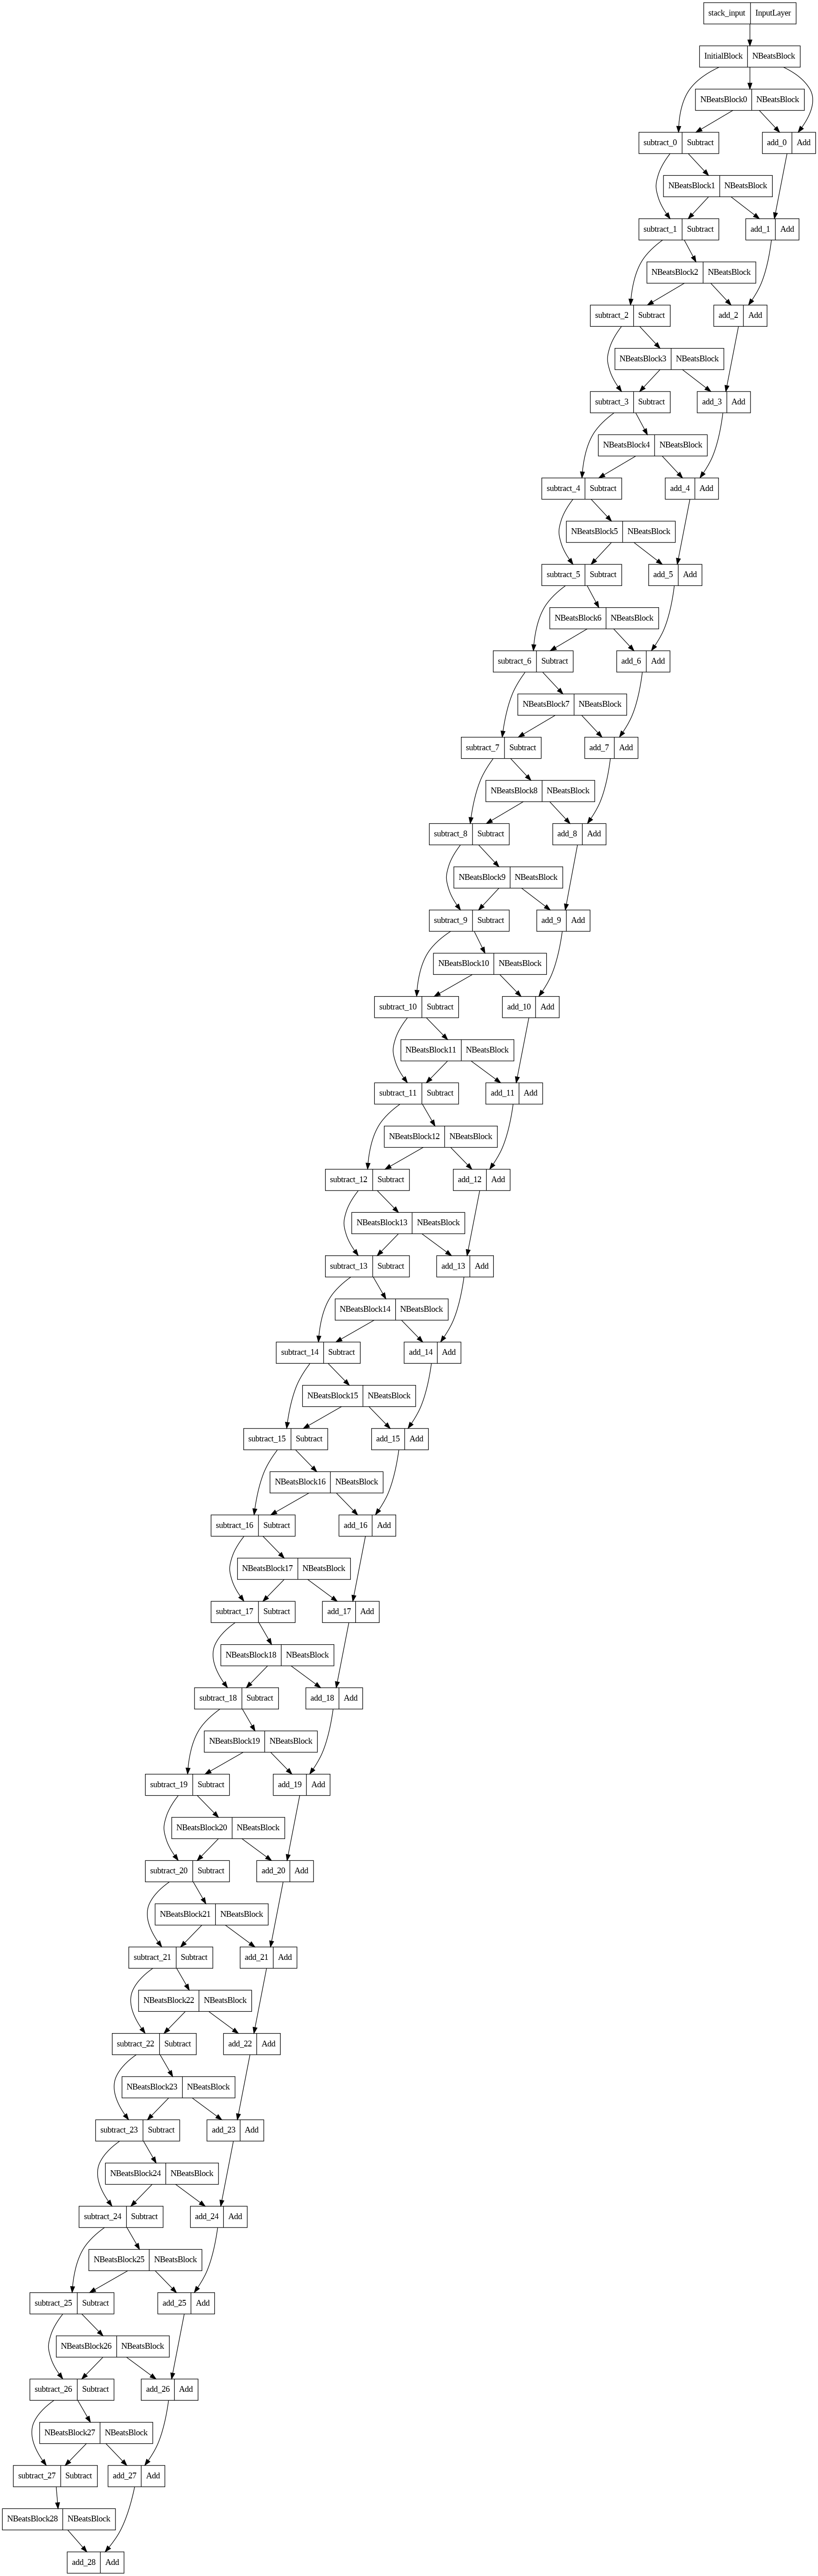

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8 : Create an emsenble

In [ ]:
## Constructing and fitting an ensemble model


def get_ensemble_model(horizon = HORIZON,
                       train_data = train_dataset,
                       test_data = test_dataset,
                       num_iter = 10,
                       num_epochs = 1000,
                       loss_fns = ['mae', 'mse', 'mape']):
  ensemble_models = []

  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f'Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}')

      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer = 'he_normal', activation = 'relu'),
          layers.Dense(128, kernel_initializer = 'he_normal', activation = 'relu'),
          layers.Dense(HORIZON)
      ])


      model.compile(loss = loss_function,
                    optimizer = 'adam',
                    metrics = ['mae', 'mse'])

      model.fit(train_data,
                epochs = num_epochs,
                verbose = 0,
                validation_data = test_data,
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                              patience = 200,
                                                              restore_best_weights = True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                                  patience = 100,
                                                                  verbose = 1)])

      ensemble_models.append(model)

  return ensemble_models

In [ ]:
ensemble_models = get_ensemble_model(num_iter = 5,
                                     num_epochs = 1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 967: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 421: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 521: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 202: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 931: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 703: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 339: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 439: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by redu

In [ ]:
len(ensemble_models)

15

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)

In [ ]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8821.249,  8776.619,  9053.388, ..., 50069.066, 48601.293,
        45804.855],
       [ 8828.71 ,  8763.315,  8947.395, ..., 49873.703, 48831.867,
        46710.926],
       [ 8801.761,  8809.233,  9094.941, ..., 49665.266, 47877.11 ,
        46733.508],
       ...,
       [ 8798.183,  8756.195,  9084.171, ..., 49840.395, 48593.12 ,
        45896.06 ],
       [ 8828.017,  8758.188,  9060.085, ..., 50105.496, 48110.555,
        45517.09 ],
       [ 8797.417,  8756.979,  9037.297, ..., 50186.918, 47974.68 ,
        45896.402]], dtype=float32)>

In [ ]:
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_preds)

In [ ]:
ensemble_results

{'mae': 577.67163,
 'mse': 1171029.2,
 'rmse': 1082.0911,
 'mape': 2.6270268,
 'mase': 1.014809}

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis = 0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8786.025, 8774.55 , 9072.379, 8720.57 , 8747.458, 8745.31 ,
       8655.44 , 8482.468, 8462.913, 8523.182], dtype=float32)>

In [ ]:
ensemble_median = np.median(ensemble_preds, axis = 0)
ensemble_median[:10]

array([8789.865, 8763.315, 9075.921, 8719.634, 8747.441, 8742.68 ,
       8650.692, 8503.229, 8466.237, 8528.383], dtype=float32)

In [ ]:
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_mean)
ensemble_results

{'mae': 564.94147,
 'mse': 1136488.1,
 'rmse': 1066.0619,
 'mape': 2.5534034,
 'mase': 0.9924457}

In [ ]:
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_median)
ensemble_results

{'mae': 566.04755,
 'mse': 1132542.5,
 'rmse': 1064.2097,
 'mape': 2.561255,
 'mase': 0.99438876}

### Plotting prediction intervals

In [ ]:
# Find upper and lower bounds of ensemble predictins

def get_upper_and_lower(preds):
  std = tf.math.reduce_std(preds, axis = 0)

  interval = 1.96 * std

  preds_mean = tf.reduce_mean(preds, axis = 0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

In [ ]:
lower, upper = get_upper_and_lower(ensemble_preds)

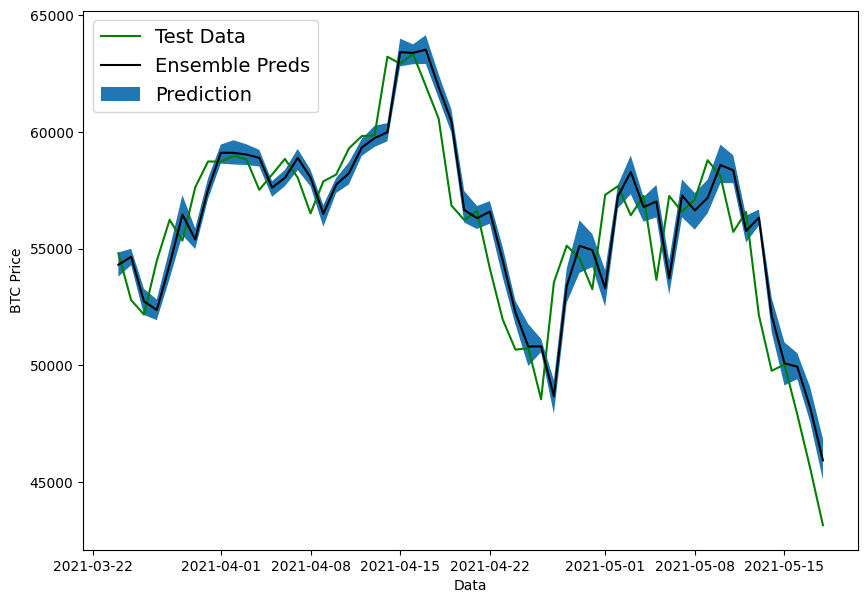

In [ ]:
# Get the median and mmean

ensemble_median = np.median(ensemble_preds, axis = 0)

offset = 500
plt.figure(figsize = (10, 7))

plt.plot(X_test.index[offset:], y_test[offset:], 'g', label = 'Test Data')
plt.plot(X_test.index[offset:], ensemble_median[offset:], 'k-', label = 'Ensemble Preds')
plt.xlabel('Data')
plt.ylabel('BTC Price')

plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label = 'Prediction')
plt.legend(loc="upper left", fontsize=14);

## Model 9: Train a model on the full historical data to make predictions into the future

In [ ]:
bitcoin_prices_windowed.head()

,Prices,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X_all = bitcoin_prices_windowed.dropna().drop(['Prices', 'block_reward'], axis = 1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()['Prices'].to_numpy()

In [ ]:
len(X_all), len(y_all)

(2780, 2780)

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)


# Create model
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_9_future_model')

# Compile
model_9.compile(loss = tf.keras.losses.mae,
                optimizer = 'adam')


# Fit
model_9.fit(dataset_all,
            epochs =100,
            verbose = 0,
          )

### Make predictions into future

In [ ]:
INTO_FUTURE = 14

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

In [ ]:
def make_future_forecasts(values, model, into_future, window_size = WINDOW_SIZE):
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(INTO_FUTURE):
    future_pred = model.predict(tf.expand_dims(last_window, axis = 0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
future_forecast = make_future_forecasts(values = y_all,
                                        model = model_9,
                                        into_future = INTO_FUTURE,
                                        window_size = WINDOW_SIZE)

1/1 [==============================] - 0s 29ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55691.39453125

1/1 [==============================] - 0s 26ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55691.39453125] -> Prediction: 51688.53515625

1/1 [==============================] - 0s 27ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55691.39453125 51688.53515625] -> Prediction: 49711.03515625

1/1 [==============================] - 0s 33ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55691.39453125 51688.53515625 49711.03515625] -> Prediction: 47868.12109375

1/1 [==============================] - 0s 31ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55691.39453125
 51688.53515625 49711.03515625 47868.1

## Plot future forecasts

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [ ]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55691.395, 51688.535, 49711.035, 47868.12 , 47181.59 ,
        45088.402, 48811.3  , 54703.816, 50994.055, 48274.68 , 46813.113,
        46723.043, 47144.37 , 51607.676], dtype=float32))

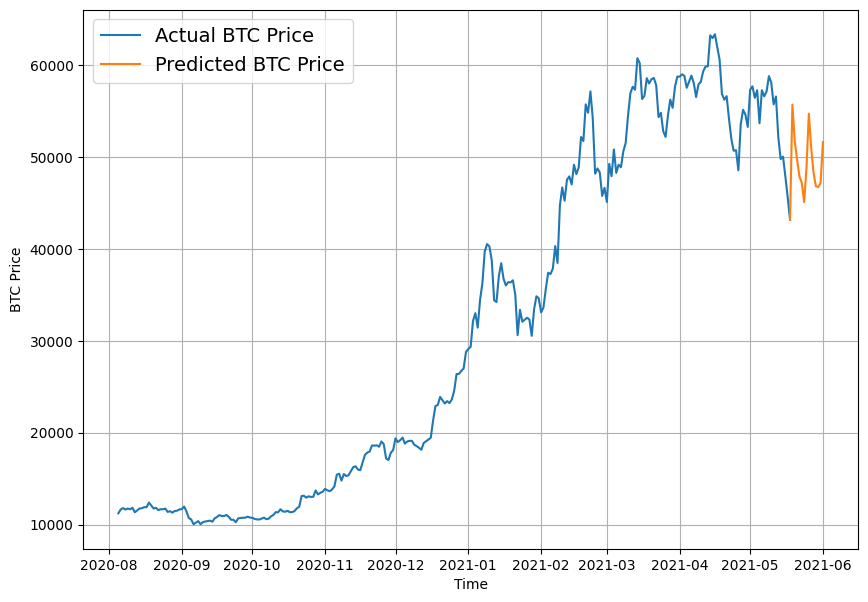

In [ ]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Mdoel 10: Turkye

In [ ]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [ ]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)


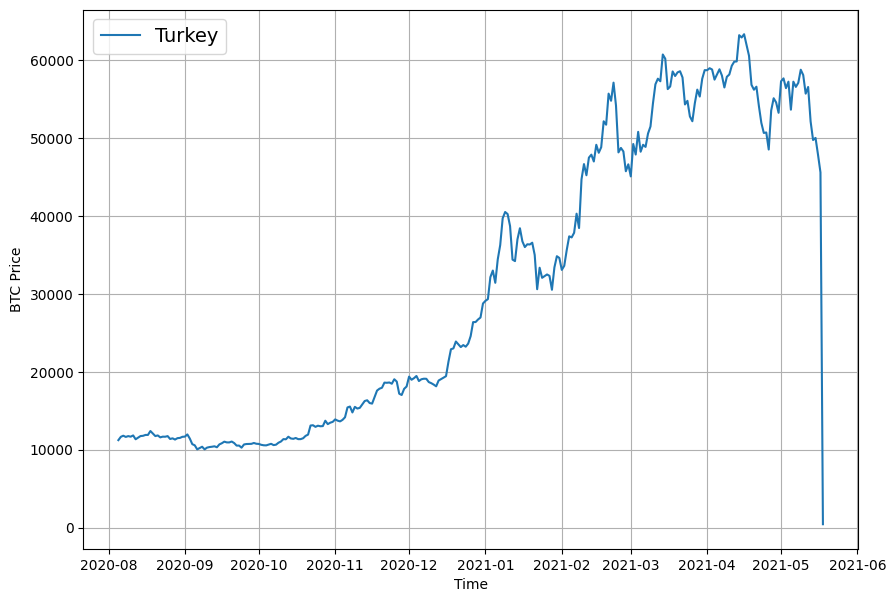

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = btc_timesteps_turkey,
                 values = btc_price_turkey,
                 format = '-',
                 label = 'Turkey',
                 start = 2500)

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_split(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 730.6035


730.6034545898438

In [ ]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiment/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 642.5617


642.5617065429688

In [ ]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8843.764 , 8768.858 , 9024.813 , 8796.3545, 8748.003 , 8732.398 ,
       8665.348 , 8538.954 , 8447.309 , 8524.392 ], dtype=float32)>

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17139.693,
 'mse': 615195000.0,
 'rmse': 23734.76,
 'mape': 121.50177,
 'mase': 26.523731}

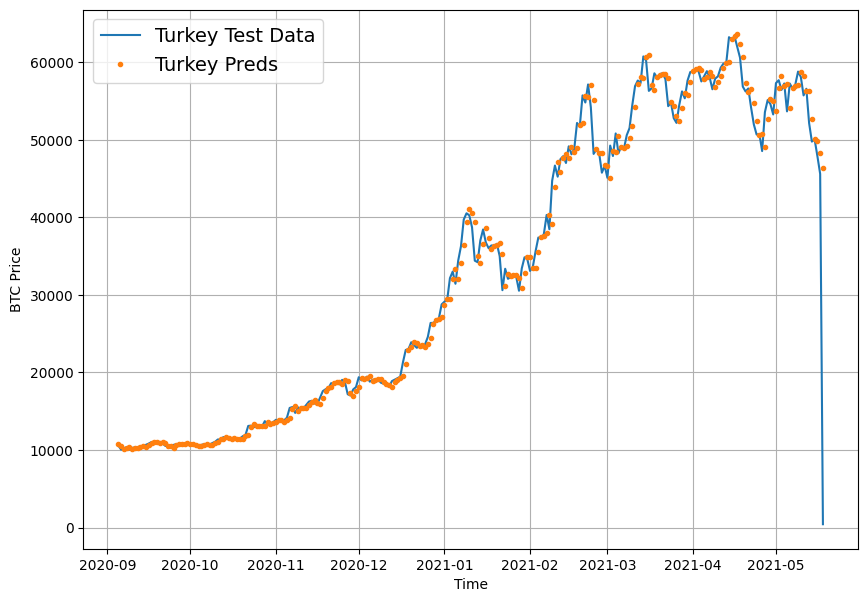

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_result,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,563.905945,1.161169e+06,1077.575317,2.523117,0.990627
model_2_dense_w30_h1,618.714478,1.269824e+06,1126.864746,2.819818,1.081519
model_3_dense_w30_h7,1248.393799,5.491441e+06,1430.634033,5.741622,2.221447
model_4_CONV1D,571.702209,1.184002e+06,1088.118530,2.553198,1.004322
model_5_LSTM,601.634521,1.289911e+06,1135.742310,2.705746,1.056905
model_6_multivariate,566.097290,1.154354e+06,1074.408569,2.543314,0.994476
model_8_NBEATs,578.889404,1.206004e+06,1098.182129,2.654211,1.016948
model_9_ensemble,566.047546,1.132542e+06,1064.209717,2.561255,0.994389
model_10_turkey,17139.693359,6.151950e+08,23734.759766,121.501770,26.523731


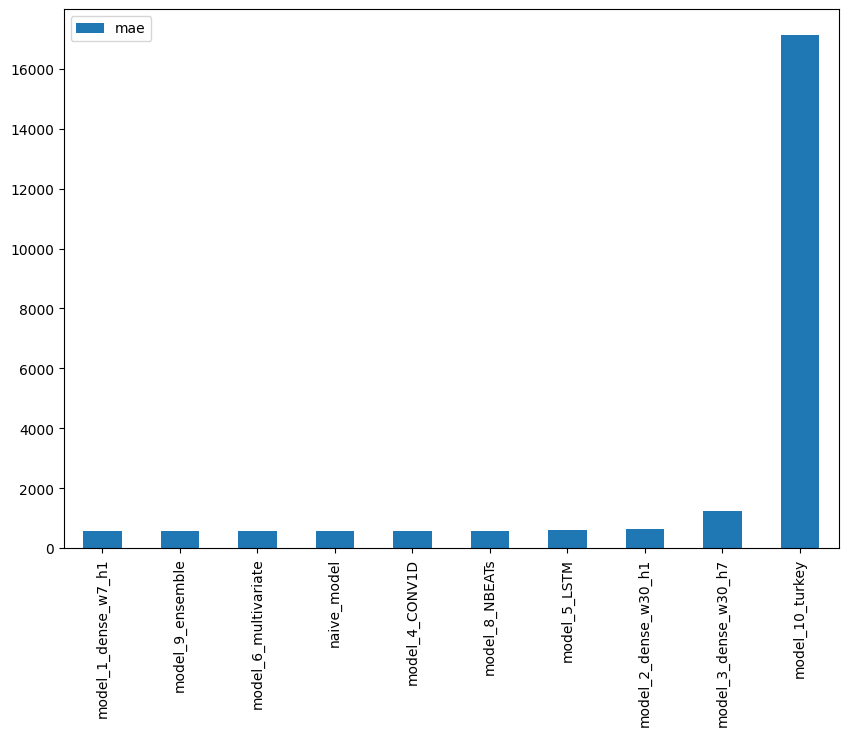

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");